# Barber Shop Analysis Project#
I will be analysing data received from the barber shop. This shop_data_2021.csv file contains date, barber, and how much they earned that day. Analysis will include:
* trends based on employee, date, money earned
* math summary for each month and employee 


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [272]:
# creating initial df
name_shop_df = pd.read_csv('shop_data_2021.csv')

# Replace barbers with generic names
name_dict = {
    "Huong Le": "Barber 1",
    "Tuyen": "Barber 2",
    "Phuong": "Barber 3",
    "Cuong": "Barber 4",
    "Dien": "Barber 5"
}

shop_df = name_shop_df.replace({'Barber': name_dict})

generic_shop_df.head()

,Date,Barber,Amount_made
0,01/01/2021,Barber 1,NaN
1,01/02/2021,Barber 1,136.0
2,01/03/2021,Barber 1,153.0
3,01/04/2021,Barber 1,153.0
4,01/05/2021,Barber 1,110.0


In [273]:
# replace all NaN values with 0
shop_df['Amount_made'] = shop_df['Amount_made'].fillna(0)
shop_df.head()

,Date,Barber,Amount_made
0,01/01/2021,Barber 1,0.0
1,01/02/2021,Barber 1,136.0
2,01/03/2021,Barber 1,153.0
3,01/04/2021,Barber 1,153.0
4,01/05/2021,Barber 1,110.0


## Explore data
Now we're going to do some EDA to see what we're working with and if we need to fix anything.  

In [274]:
shop_df.info

<bound method DataFrame.info of             Date    Barber  Amount_made
0     01/01/2021  Barber 1          0.0
1     01/02/2021  Barber 1        136.0
2     01/03/2021  Barber 1        153.0
3     01/04/2021  Barber 1        153.0
4     01/05/2021  Barber 1        110.0
...          ...       ...          ...
1820  12/27/2021  Barber 5        118.0
1821  12/28/2021  Barber 5        153.0
1822  12/29/2021  Barber 5        101.0
1823  12/30/2021  Barber 5        136.0
1824  12/31/2021  Barber 5          0.0

[1825 rows x 3 columns]>

In [275]:
shop_df.dtypes

Date            object
Barber          object
Amount_made    float64
dtype: object

In [276]:
# convert Date column into datetime datatype
shop_df['Date'] = pd.to_datetime(shop_df['Date'])
shop_df.dtypes

Date           datetime64[ns]
Barber                 object
Amount_made           float64
dtype: object

In [277]:
# unique barbers
shop_df.Barber.unique()

array(['Barber 1', 'Barber 2', 'Barber 3', 'Barber 4', 'Barber 5'],
      dtype=object)

In [278]:
shop_df['Amount_made'].describe()

count    1825.000000
mean      125.989589
std        79.571663
min         0.000000
25%        84.000000
50%       146.000000
75%       186.000000
max       318.000000
Name: Amount_made, dtype: float64

In [279]:
shop_df[["Barber", "Amount_made"]].groupby("Barber").mean()

,Amount_made
Barber,
Barber 1,133.410959
Barber 2,139.210959
Barber 3,135.780822
Barber 4,87.945205
Barber 5,133.600000


### Removing rows where Amount_made = 0
I'm realizing that these rows do not add value and do not indicate that the barber made $0 that day. The barber likely did not work those days, so I feel it best to remove those rows entirely rather than be misinterpreted.

In [280]:
shop_df = shop_df[shop_df.Amount_made != 0]
shop_df.head(10)

,Date,Barber,Amount_made
1,2021-01-02,Barber 1,136.0
2,2021-01-03,Barber 1,153.0
3,2021-01-04,Barber 1,153.0
4,2021-01-05,Barber 1,110.0
5,2021-01-06,Barber 1,102.0
7,2021-01-08,Barber 1,105.0
8,2021-01-09,Barber 1,143.0
9,2021-01-10,Barber 1,102.0
10,2021-01-11,Barber 1,153.0
11,2021-01-12,Barber 1,119.0


In [281]:
shop_df['Amount_made'].describe()

count    1407.000000
mean      163.419332
std        45.748638
min        34.000000
25%       136.000000
50%       158.000000
75%       190.000000
max       318.000000
Name: Amount_made, dtype: float64

In [282]:
shop_df[["Barber", "Amount_made"]].groupby("Barber").mean()


,Amount_made
Barber,
Barber 1,170.859649
Barber 2,164.440129
Barber 3,163.564356
Barber 4,160.500000
Barber 5,157.303226


Removing the 0's from the column Amout_made increased the mean for each barber by differing amounts for the days they actually worked.

Now let's start visualizing some of this data!

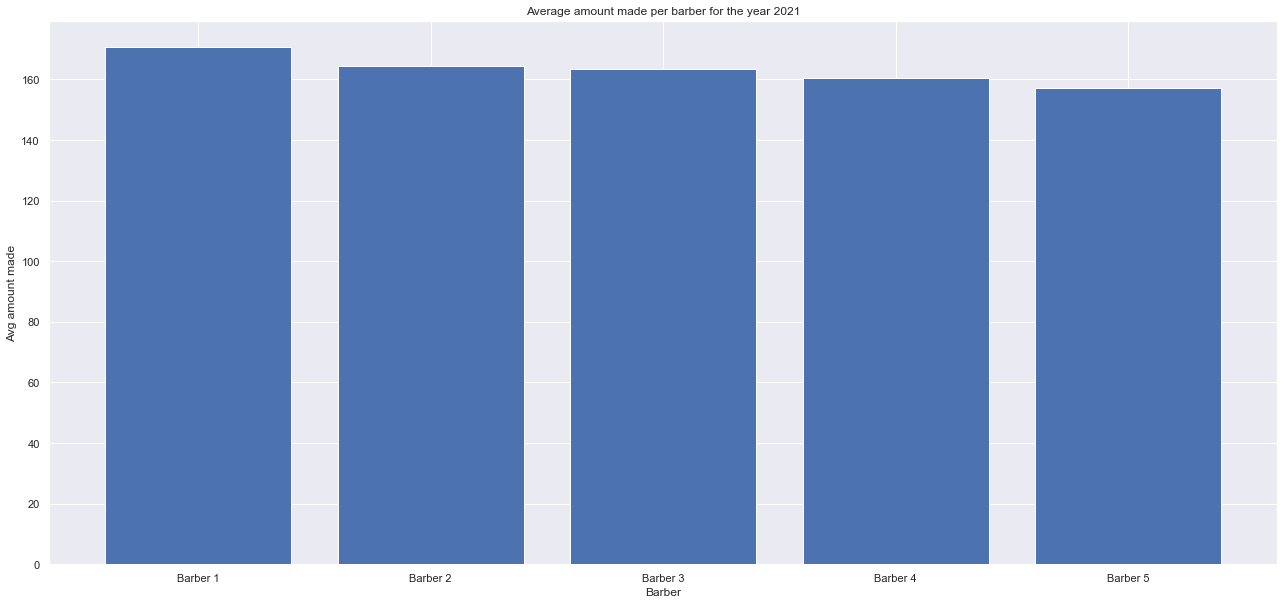

In [283]:
# Displaying the average each barber made each day throughout the entire year
fig, ax = plt.subplots(1, 1)

avg_made_barber = shop_df[["Barber", "Amount_made"]].groupby("Barber").mean().reset_index()
barbers = avg_made_barber['Barber']
avg_amt_made = avg_made_barber['Amount_made']

ax.grid(zorder=0)
plt.bar(barbers, avg_amt_made, zorder=3)

plt.xlabel("Barber")
plt.ylabel("Avg amount made")
plt.title("Average amount made per barber for the year 2021")
plt.show()

In [284]:
# Creating new column containing the month
shop_df['month'] = shop_df['Date'].dt.month

dw_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Create new column containing the day of the week and changing it to our dictionary to display actual day instead of integer
shop_df['day_of_week'] = shop_df['Date'].dt.weekday.map(dw_mapping)

shop_df.head(10)

C:\Users\Chris\AppData\Local\Temp\ipykernel_21696\311851461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_df['month'] = shop_df['Date'].dt.month
C:\Users\Chris\AppData\Local\Temp\ipykernel_21696\311851461.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_df['day_of_week'] = shop_df['Date'].dt.weekday.map(dw_mapping)


,Date,Barber,Amount_made,month,day_of_week
1,2021-01-02,Barber 1,136.0,1,Saturday
2,2021-01-03,Barber 1,153.0,1,Sunday
3,2021-01-04,Barber 1,153.0,1,Monday
4,2021-01-05,Barber 1,110.0,1,Tuesday
5,2021-01-06,Barber 1,102.0,1,Wednesday
7,2021-01-08,Barber 1,105.0,1,Friday
8,2021-01-09,Barber 1,143.0,1,Saturday
9,2021-01-10,Barber 1,102.0,1,Sunday
10,2021-01-11,Barber 1,153.0,1,Monday
11,2021-01-12,Barber 1,119.0,1,Tuesday


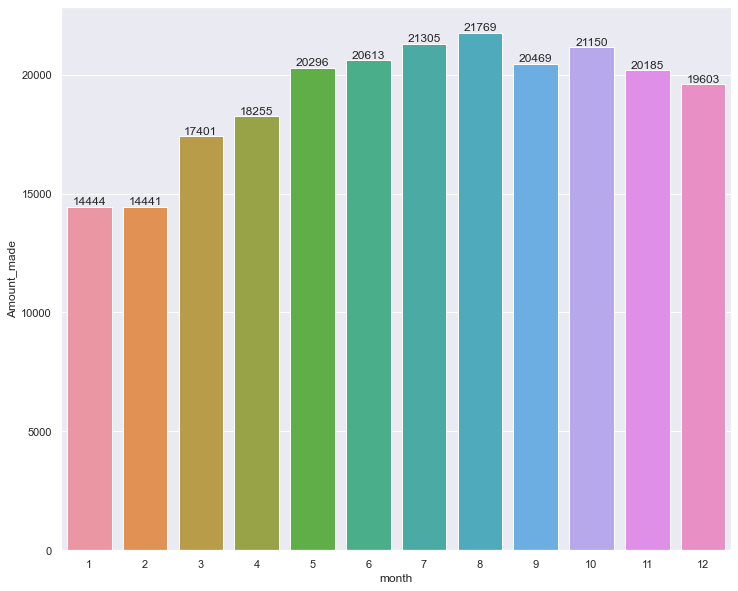

In [285]:
# setting the seaborn figsize
sns.set(rc={'figure.figsize':(12, 10)})

# Here we are looking at how much money was made between all the barbers for each month
count_month = shop_df['Amount_made'].groupby(shop_df['month']).sum()

count_month = pd.DataFrame(count_month).reset_index()

ax = sns.barplot(x='month', y='Amount_made', data=count_month)
for i in ax.containers:
    ax.bar_label(i,)

In [286]:
# Show the total made each day of the week
sum_day = shop_df['Amount_made'].groupby(shop_df['day_of_week']).sum()

# Create new df containing day_of_week and Amount_made so we can create a bar chart
sum_day = pd.DataFrame(sum_day).reset_index()
sum_day

,day_of_week,Amount_made
0,Friday,38024.0
1,Monday,32628.0
2,Saturday,39253.0
3,Sunday,32123.0
4,Thursday,29289.0
5,Tuesday,29690.0
6,Wednesday,28924.0


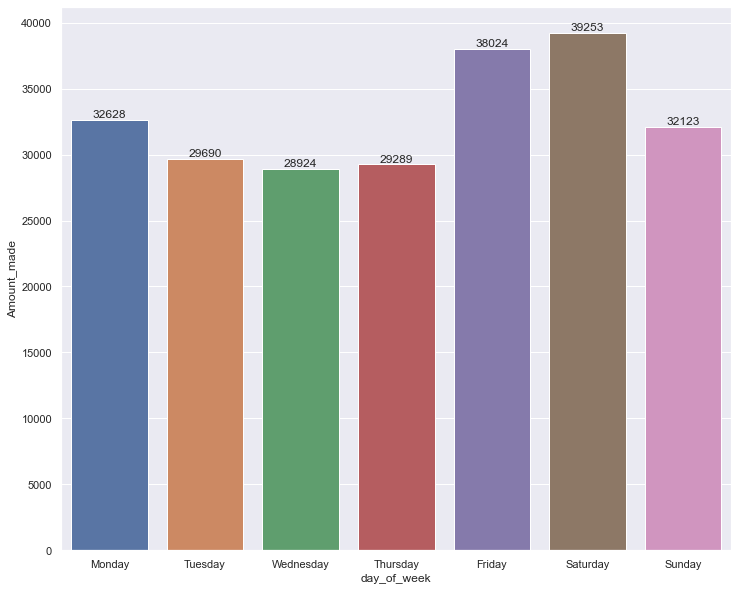

In [287]:
# How much each day of the week produces within the entire year

ax = sns.barplot(x='day_of_week', y='Amount_made', data=sum_day,
                order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
for i in ax.containers:
    ax.bar_label(i,)

In [288]:
# Showing the avg amount made per day of the week
avg_day = shop_df['Amount_made'].groupby(shop_df['day_of_week']).mean().sort_values()
avg_day_df = pd.DataFrame(avg_day).reset_index()
avg_day_df

,day_of_week,Amount_made
0,Thursday,144.995050
1,Wednesday,146.080808
2,Tuesday,147.711443
3,Monday,159.941176
4,Sunday,169.068421
5,Friday,184.582524
6,Saturday,190.548544


In [289]:
# Create new df showing the average amount each barber made each day of the week
barber_day_amt = shop_df[['Barber', 'Amount_made', 'day_of_week']].groupby(['day_of_week', 'Barber'])['Amount_made'].mean()
barber_day_amt_df = pd.DataFrame(barber_day_amt)

In [290]:
barber_day_amt_df

Amount_made
day_of_week Barber               
Friday      Barber 1   195.695652
            Barber 2   179.346154
            Barber 3   179.607843
            Barber 4   185.941176
            Barber 5   175.500000
Monday      Barber 1   162.795918
            Barber 2   157.615385
            Barber 3   157.000000
            Barber 4   160.530612
            Barber 5   159.134615
Saturday    Barber 1   195.022222
            Barber 2   191.843137
            Barber 3   187.440000
            Barber 4   159.888889
            Barber 5   193.764706
Sunday      Barber 1   171.279070
            Barber 2   165.918367
            Barber 3   171.346939
            Barber 5   168.000000
Thursday    Barber 1   191.333333
            Barber 2   146.745098
            Barber 3   146.820000
            Barber 4   149.836735
            Barber 5   133.632653
Tuesday     Barber 1   149.387755
            Barber 2   145.372549
            Barber 3   150.140000
            Barber 5   146.058824
Wednesday   Barber 1   153.620000
            Barber 2   159.333333
            Barber 3   146.470588
            Barber 4   142.142857
            Barber 5   140.865385

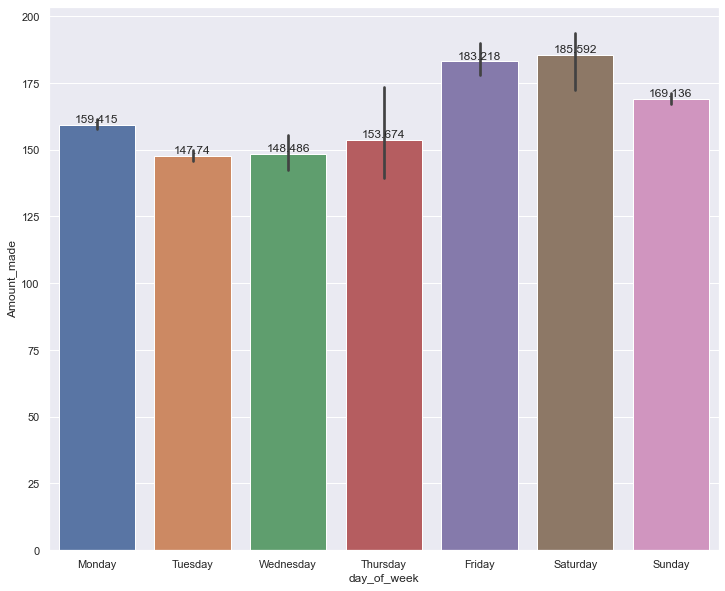

In [291]:
# Show amount made per day of the week with range
ax = sns.barplot(x='day_of_week', y='Amount_made', data=barber_day_amt_df.reset_index(),
                order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='day_of_week', ylabel='Amount_made'>

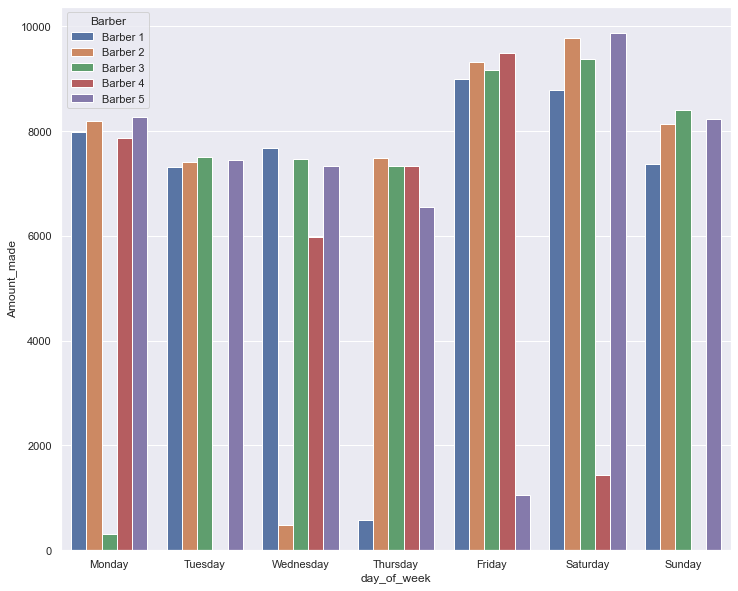

In [292]:
# Show how much each barber made in total throughout the year per day
sum_day_df = shop_df[['Barber', 'Amount_made', 'day_of_week']].groupby(['day_of_week', 'Barber'])['Amount_made'].sum().reset_index()
sns.barplot(x='day_of_week',
            y='Amount_made',
            hue='Barber',
            data=sum_day_df,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

<AxesSubplot:xlabel='day_of_week', ylabel='Amount_made'>

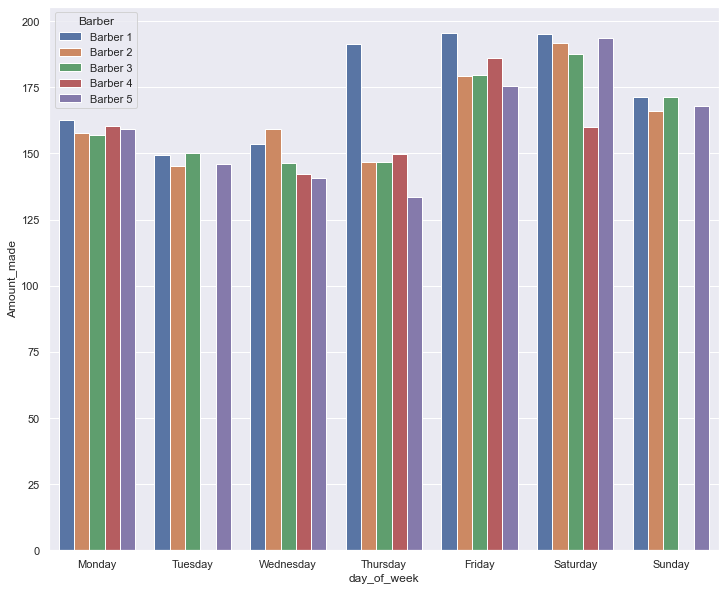

In [293]:
# The mean amount made per day for each barber
mean_day_df = shop_df[['Barber', 'Amount_made', 'day_of_week']].groupby(['day_of_week', 'Barber'])['Amount_made'].mean().reset_index()
sns.barplot(x='day_of_week',
            y='Amount_made',
            hue='Barber',
            data=mean_day_df,
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

<AxesSubplot:xlabel='day_of_week', ylabel='Amount_made'>

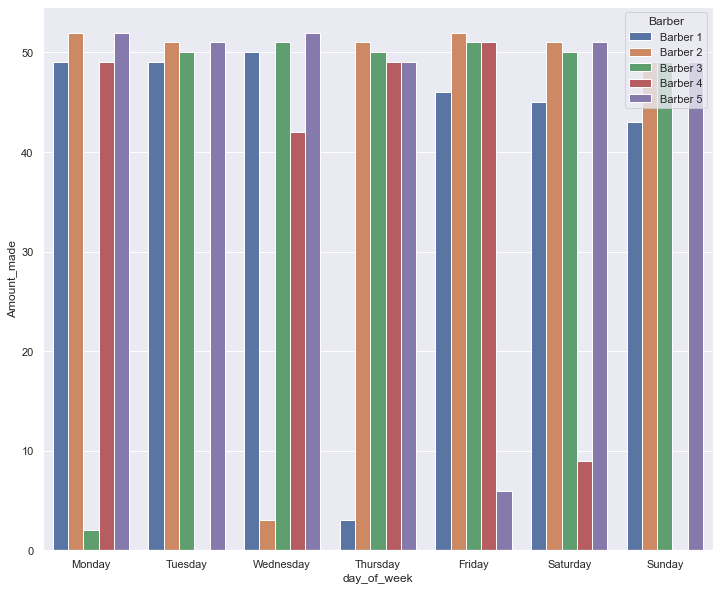

In [294]:
# Display how many days were worked for each barber for each day of the week
sns.barplot(x='day_of_week',
            y='Amount_made',
            hue='Barber',
            data=shop_df[['Barber', 'Amount_made', 'day_of_week']].groupby(['day_of_week', 'Barber'])['Amount_made'].count().reset_index(),
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

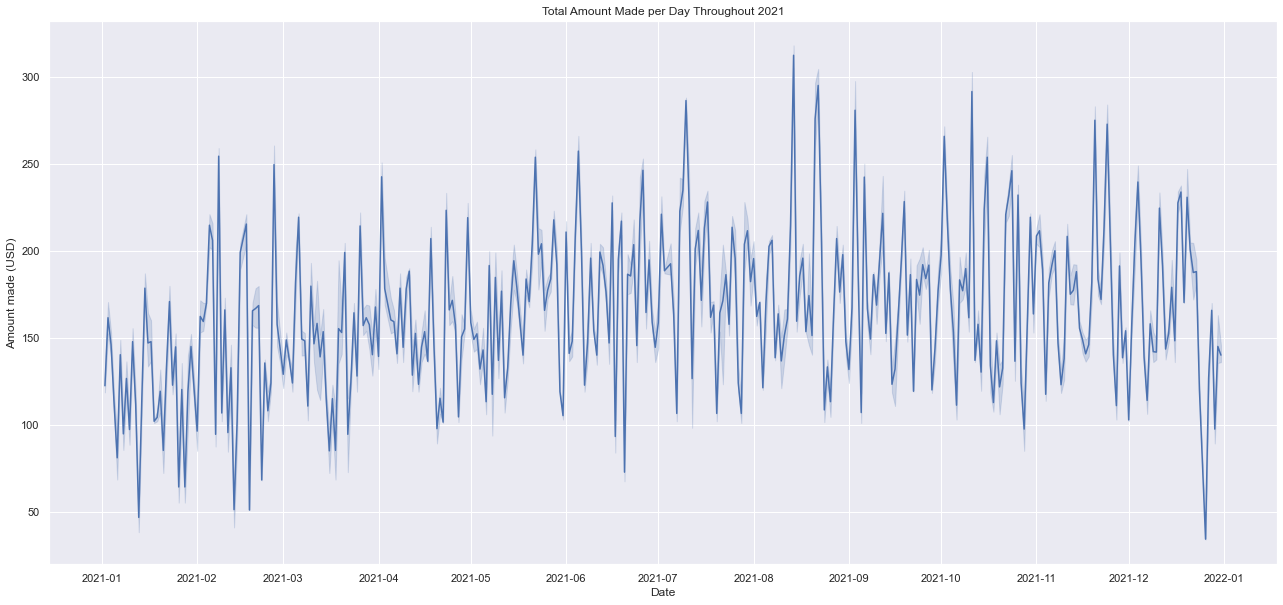

In [324]:
from matplotlib import dates

# Create and overview of profit over the entire year
sns.set(rc={'figure.figsize':(22, 10)})

fig, ax = plt.subplots()

sns.lineplot(x='Date', y='Amount_made', data=shop_df)
ax.set_xlabel('Date')
ax.set_ylabel('Amount made (USD)')
ax.set_title('Total Amount Made per Day Throughout 2021')
ax.xaxis.set_major_locator(dates.MonthLocator())  # increase ticks to show each month


There is an upward trend closer to the warmer months, but the colder months tend to be less profitable. The beginning of 2021 was also during the COVID lockdown which could explain the much lower profits compared to throughout the rest of the year.

In [296]:
# Create a new df containing the total amount made and the month
sum_month = shop_df['Amount_made'].groupby(shop_df['month']).sum()
sum_month_df = pd.DataFrame(count_month)
sum_month_df

,month,Amount_made
0,1,14444.0
1,2,14441.0
2,3,17401.0
3,4,18255.0
4,5,20296.0
5,6,20613.0
6,7,21305.0
7,8,21769.0
8,9,20469.0
9,10,21150.0


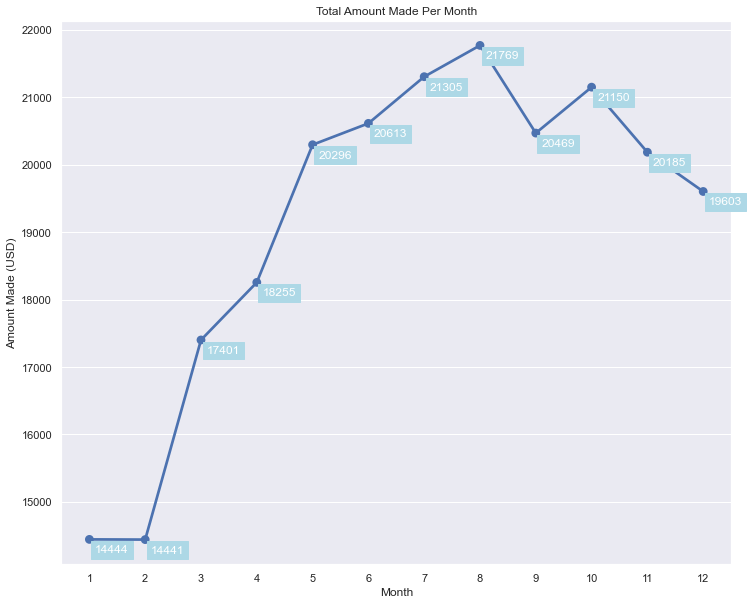

In [297]:
# Create a lineplot showing how much is made per month
sns.set(rc={'figure.figsize':(12, 10)})
p = sns.pointplot(x='month', y='Amount_made', data=sum_month_df)
p.set_xlabel('Month')
p.set_ylabel('Amount Made (USD)')
p.set_title('Total Amount Made Per Month')

# Add labels points to the plot
for x, y in zip(sum_month_df['month'], sum_month_df['Amount_made']):
    plt.text(x=x-.9, y=y-200, s='{:.0f}'.format(y), color='white').set_backgroundcolor('#ADD8E6')

In [298]:
# Create a new df containing only the date and amount_made
day_sum_df = shop_df[['Date', 'Amount_made']].groupby('Date').sum().reset_index()
day_sum_df

,Date,Amount_made
0,2021-01-02,612.0
1,2021-01-03,646.0
2,2021-01-04,584.0
3,2021-01-05,446.0
4,2021-01-06,324.0
...,...,...
353,2021-12-27,507.0
354,2021-12-28,663.0
355,2021-12-29,390.0
356,2021-12-30,580.0


In [299]:
# Select the range of dates for January
janmask = (day_sum_df['Date'] >= '2021-1-1') & (day_sum_df['Date'] <= '2021-1-31')
sum_jan = day_sum_df.loc[janmask]

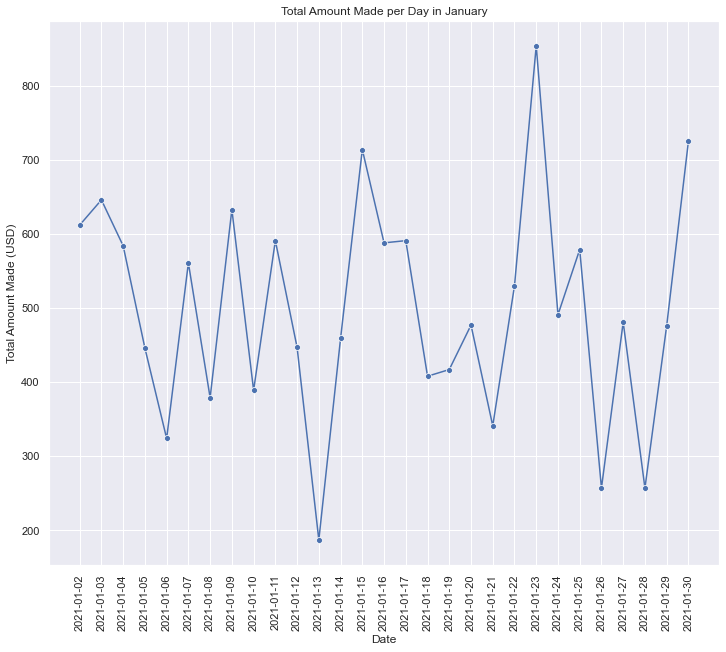

In [300]:
p = sns.lineplot(x='Date', y='Amount_made', marker='o', data=sum_jan)
p.set_xlabel('Date')
p.set_ylabel('Total Amount Made (USD)')
p.set_title('Total Amount Made per Day in January')

# Display each day within this month that we have data for
p.set(xticks=sum_jan.Date.values)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


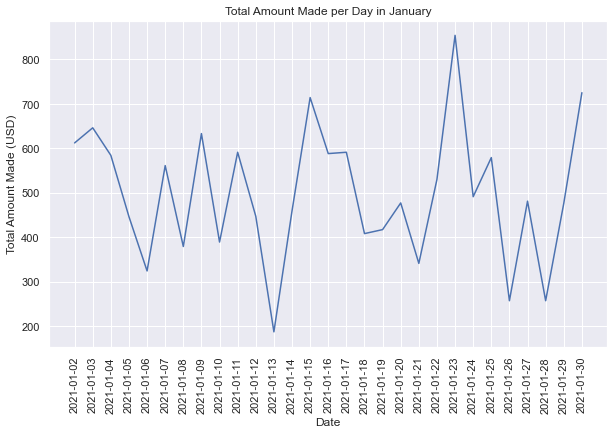

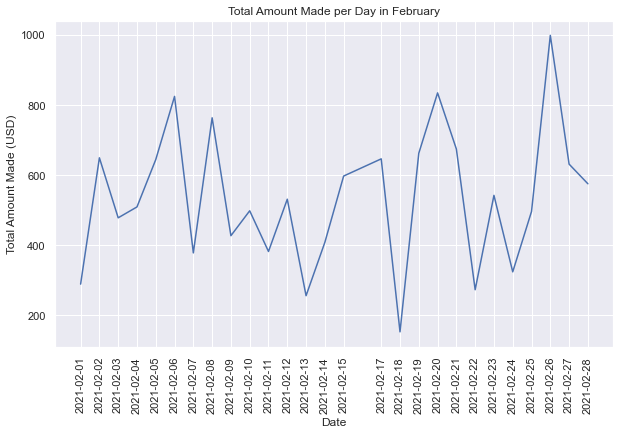

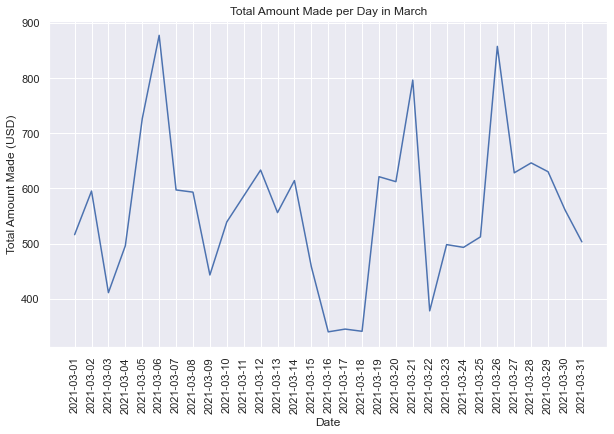

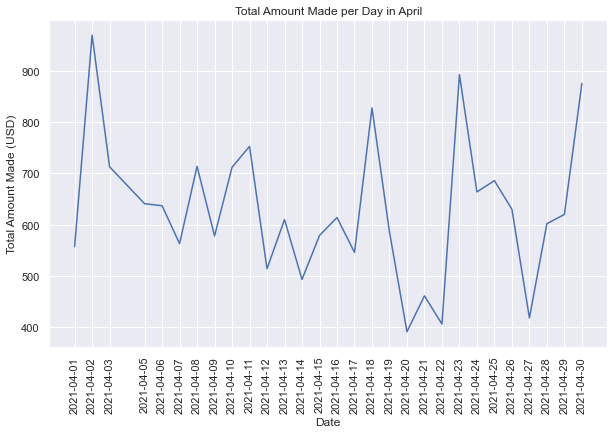

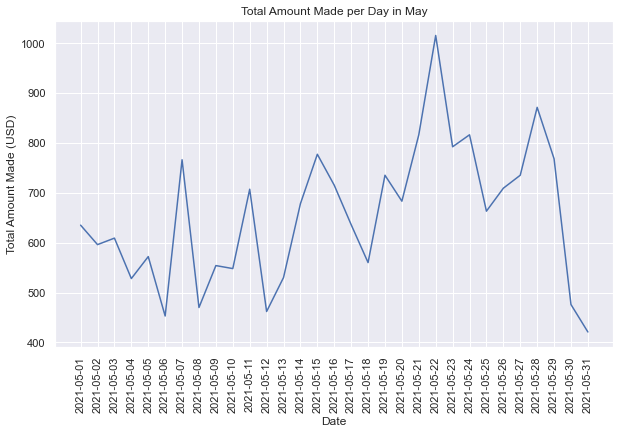

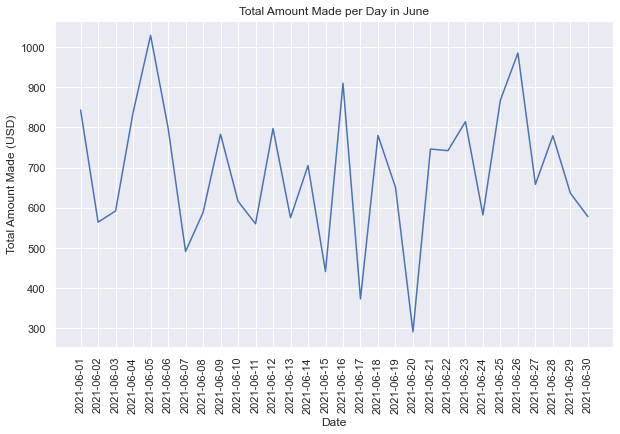

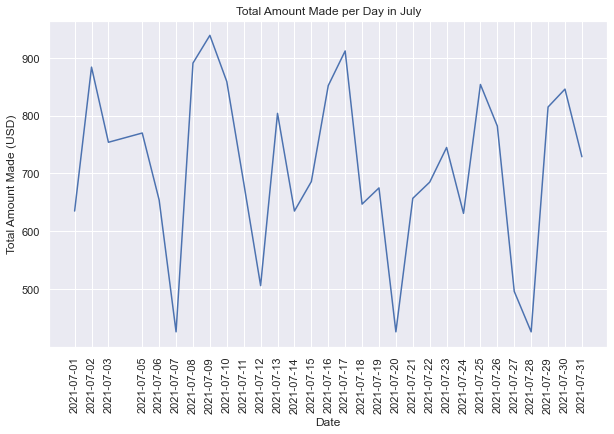

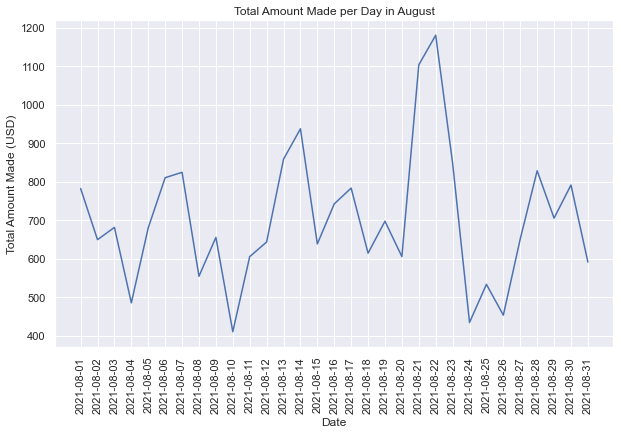

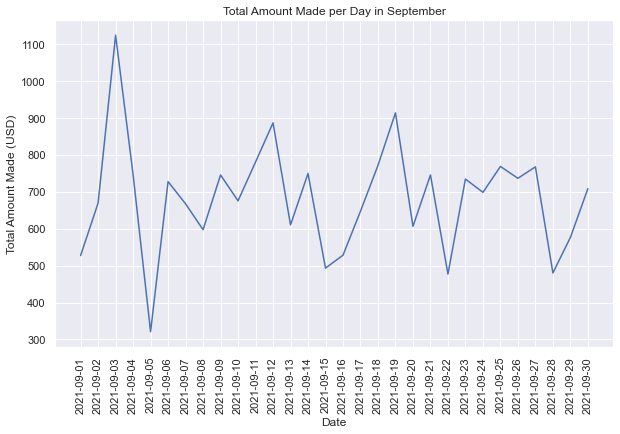

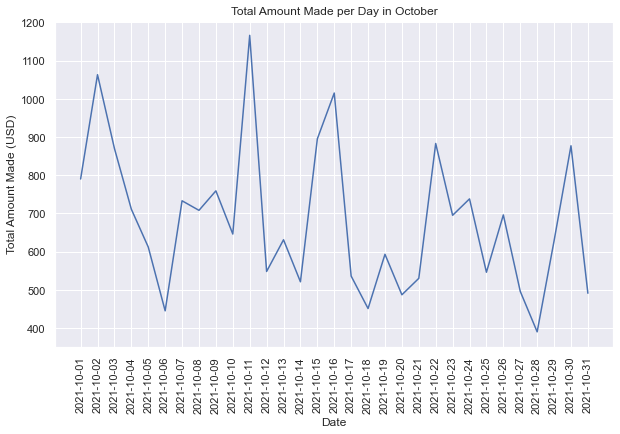

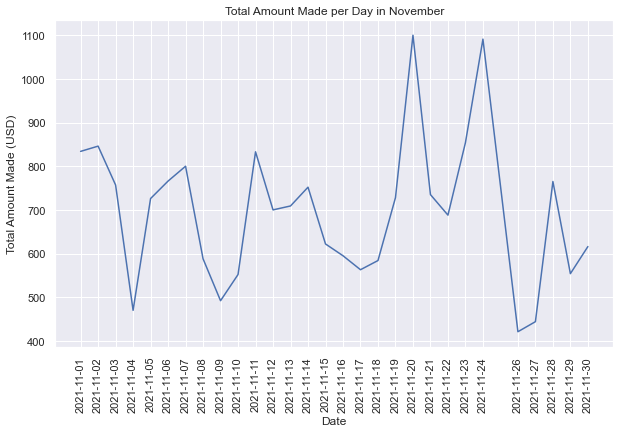

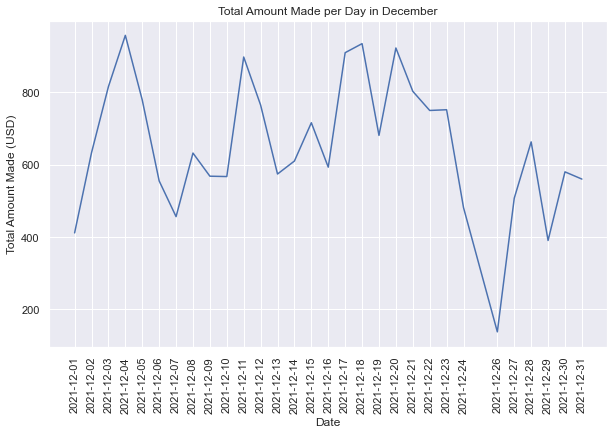

In [301]:
# Select range of dates for each month
jan_mask = (day_sum_df['Date'] >= '2021-1-1') & (day_sum_df['Date'] <= '2021-1-31')
feb_mask = (day_sum_df['Date'] >= '2021-2-1') & (day_sum_df['Date'] <= '2021-2-28')
mar_mask = (day_sum_df['Date'] >= '2021-3-1') & (day_sum_df['Date'] <= '2021-3-31')
apr_mask = (day_sum_df['Date'] >= '2021-4-1') & (day_sum_df['Date'] <= '2021-4-30')
may_mask = (day_sum_df['Date'] >= '2021-5-1') & (day_sum_df['Date'] <= '2021-5-31')
jun_mask = (day_sum_df['Date'] >= '2021-6-1') & (day_sum_df['Date'] <= '2021-6-30')
jul_mask = (day_sum_df['Date'] >= '2021-7-1') & (day_sum_df['Date'] <= '2021-7-31')
aug_mask = (day_sum_df['Date'] >= '2021-8-1') & (day_sum_df['Date'] <= '2021-8-31')
sept_mask = (day_sum_df['Date'] >= '2021-9-1') & (day_sum_df['Date'] <= '2021-9-30')
oct_mask = (day_sum_df['Date'] >= '2021-10-1') & (day_sum_df['Date'] <= '2021-10-31')
nov_mask = (day_sum_df['Date'] >= '2021-11-1') & (day_sum_df['Date'] <= '2021-11-30')
dec_mask = (day_sum_df['Date'] >= '2021-12-1') & (day_sum_df['Date'] <= '2021-12-31')


# Create a class so that we can apply it for each month
class Month_line:
    def __init__(self, mask, month):
        self.mask = mask
        self.month = month
    
    # Create the lineplot and label it appropriately
    def get_lineplt(self):
        month_mask = day_sum_df.loc[self.mask]
        fig, ax = plt.subplots(figsize=(10,6))
        p = sns.lineplot(x='Date', y='Amount_made', data=month_mask)
        p.set_xlabel('Date')
        p.set_ylabel('Total Amount Made (USD)')
        p.set_title('Total Amount Made per Day in ' + self.month)
        plt.xticks(rotation=90)
        p.set(xticks=month_mask.Date.values)

# Create each object and print out the lineplot
jan_line = Month_line(jan_mask, 'January')
jan_line.get_lineplt()

feb_line = Month_line(feb_mask, 'February')
feb_line.get_lineplt()

mar_line = Month_line(mar_mask, 'March')
mar_line.get_lineplt()

apr_line = Month_line(apr_mask, 'April')
apr_line.get_lineplt()

may_line = Month_line(may_mask, 'May')
may_line.get_lineplt()

jun_line = Month_line(jun_mask, 'June')
jun_line.get_lineplt()

jul_line = Month_line(jul_mask, 'July')
jul_line.get_lineplt()

aug_line = Month_line(aug_mask, 'August')
aug_line.get_lineplt()

sept_line = Month_line(sept_mask, 'September')
sept_line.get_lineplt()

oct_line = Month_line(oct_mask, 'October')
oct_line.get_lineplt()

nov_line = Month_line(nov_mask, 'November')
nov_line.get_lineplt()

dec_line = Month_line(dec_mask, 'December')
dec_line.get_lineplt()


Now we're able to breakdown how much the barber shop made each day of each month and see the trends for which days are busier than others and how they relate to major holidays.